In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_24646_R')

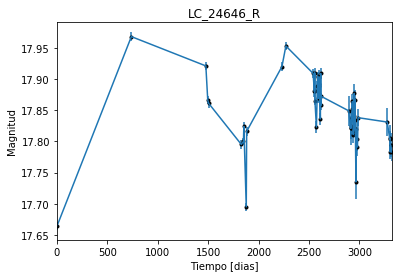

In [2]:
data = np.genfromtxt('LC_24646_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_24646_R')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

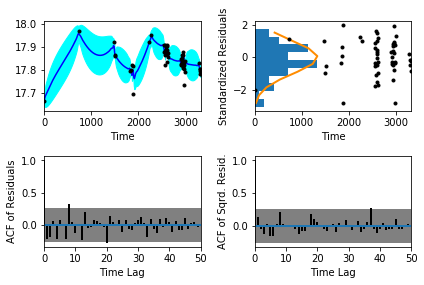

In [5]:
sample.assess_fit()

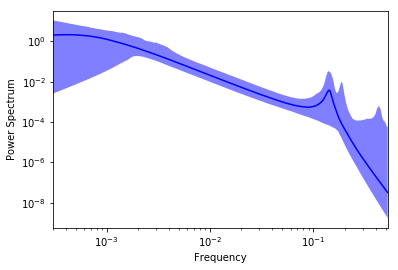

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,0.0123367,'Medida del nivel de ruido')

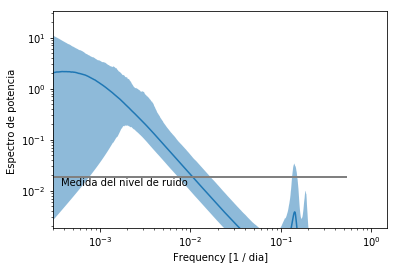

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

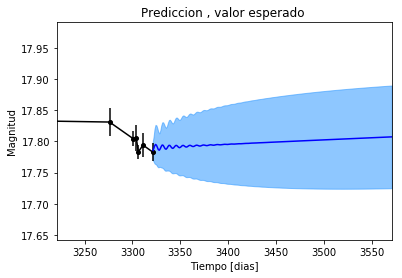

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


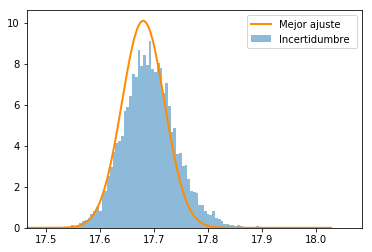

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

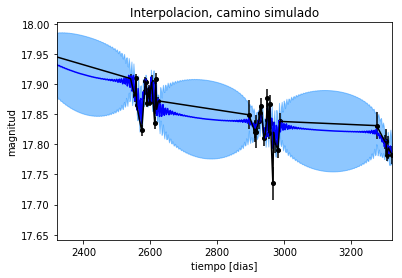

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

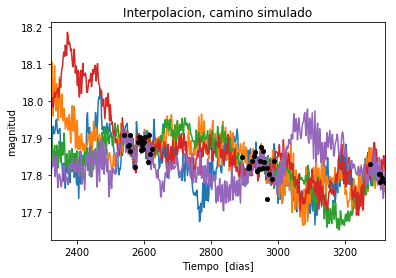

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 2220.25278617
Median: 0.00613637105391
Standard deviation: 0.0218392943567
68% credibility interval: [ 0.0030126   0.01150237]
95% credibility interval: [ 0.00098097  0.02636805]
99% credibility interval: [ 0.00034751  0.09326003]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 2081.44767516
Median: 0.00613637105391
Standard deviation: 0.0208691236213
68% credibility interval: [ 0.00301033  0.0114837 ]
95% credibility interval: [ 0.00098097  0.02595738]
99% credibility interval: [ 0.00034751  0.08697182]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 232.657946607
Median: 0.167612122006
Standard deviation: 0.289694985203
68%

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 588.780036032
Median: 125.49359891
Standard deviation: 2.30501450419
68% credibility interval: [ 122.91355373  127.37788793]
95% credibility interval: [ 119.78744255  128.57401698]
99% credibility interval: [ 117.51767581  129.13894864]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 219.230435538
Median: 1.14826679211
Standard deviation: 1.83916260577
68% credibility interval: [ 0.08571162  3.805549  ]
95% credibility interval: [ 0.03602694  6.22398484]
99% credibility interval: [ 0.01784871  6.60898434]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 371.312743741
Median: 0.992124260985
Standard deviation: 9.08172107524
68% credibility interval: [ 0.79455118  5.64019484]
95% credibility interval: [  0.67356896  29

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 19792.3588968
Median: 9.80904127704e-09
Standard deviation: 1.61717494248e+128
68% credibility interval: [  4.32613710e-36   1.06084671e+53]
95% credibility interval: [  1.86759947e-109   8.58212694e+096]
99% credibility interval: [  9.98740565e-117   2.56299804e+116]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 587.247092361
Median: 17.8458809778
Standard deviation: 0.0375842495078
68% credibility interval: [ 17.81082235  17.87478402]
95% credibility interval: [ 17.76102163  17.91336546]
99% credibility interval: [ 17.71412654  17.94754017]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 330.161036419
Median: 0.145453053123
Standard deviation: 0.230788193747
68% credibility interval: [ 0.13696049  0.3478399 ]
95% credibility interval: [ 0.12251626  0.87080186]
99% credibility interval: [ 0.10249572  0.92953979]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 330.161036419
Median: 0.145453053123
Standard deviation: 0.230788193747
68% credibility interval: [ 0.13696049  0.3478399 ]
95% credibility interval: [ 0.12251626  0.87080186]
99% credibility interval: [ 0.10249572  0.92953979]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 236.352164668
Median: 0.0
Standard deviation: 0.000750655615942
68% cred

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 588.780036032
Median: 125.49359891
Standard deviation: 2.30501450419
68% credibility interval: [ 122.91355373  127.37788793]
95% credibility interval: [ 119.78744255  128.57401698]
99% credibility interval: [ 117.51767581  129.13894864]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1089.81377178
Median: 0.00850955625864
Standard deviation: 0.00481842914605
68% credibility interval: [ 0.00554564  0.01390997]
95% credibility interval: [ 0.00380434  0.02190311]
99% credibility interval: [ 0.00309008  0.02866275]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1968.54152327
Median: 1.06381018063
Standard deviation: 0.220886298227
68% credibility interval: [ 0.88163444  1.31491093]
95% credibility interval: [ 0.74107154  1.59438886]
99% credibility interval: [ 0.66424235  1.76951712]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 228.113092203
Median: 0.00771461031285
Standard deviation: 0.224451513062
68% credibility interval: [  1.15662735e-55   2.96534809e-02]
95% credibility interval: [  1.93685026e-99   3.12261332e-01]
99% credibility interval: [  2.67471964e-119   1.87898543e+000]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 2220.25278617
Median: (-0.0385559564454-0.86427240572j)
Standard deviation: 1.456563041
68% credibility interval: [-0.07227155-0.93112771j -0.01892873-0.84977938j]
95% credibility interval: [-0.16567534-1.01228192j -0.00616360-0.88502527j]
99% credibility interval: [-0.58597007-2.11869463j -0.00218348-5.44153821j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 2081.44767516
Median: (-0.0385559564454+0.86427240572j)
Standard deviation: 1.45600141675
68% credibility interval: [-0.07215421+0.98372883j -0.01891447+0.97973553j]
95% credibility interval: [-0.16309504+1.2009042j  -0.00616360+0.88502527j]
99% credibility interval: [-0.54646009+2.11899094j -0.00218348+5.44153821j]
Posterior summary for parameter ar_roots  elem